# Description:



This notebook demonstrates the future price prediction for different stocks using recurrent neural networks in tensorflow. Recurrent neural networks with basic, LSTM  are implemented.

# Outline:

# Libraries and settings 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as data


# Analyze data

In [128]:
start = '2015-01-01'
end = '2021-01-01'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,25.020117
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782110
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083958
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086227
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423975


In [129]:
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352829
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050766
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094650
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.069473


In [130]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,25.020117
1,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782110
2,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083958
3,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086227
4,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423975


In [131]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,28.282499,27.552500,28.205000,27.594999,165613600.0
1,27.860001,26.837500,27.847500,27.332500,212818400.0
2,27.162500,26.352501,27.072500,26.562500,257142000.0
3,26.857500,26.157499,26.635000,26.565001,263188400.0
4,27.049999,26.674999,26.799999,26.937500,160423600.0


In [132]:
df1 = df.reset_index()['Close']
df1.head()

0    27.594999
1    27.332500
2    26.562500
3    26.565001
4    26.937500
Name: Close, dtype: float64

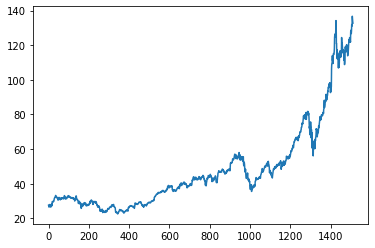

In [133]:
plt.plot(df1)

In [134]:
df1

0        27.594999
1        27.332500
2        26.562500
3        26.565001
4        26.937500
           ...    
1507    131.970001
1508    136.690002
1509    134.869995
1510    133.720001
1511    132.690002
Name: Close, Length: 1512, dtype: float64

In [135]:
ma100 = df1.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1507    118.223525
1508    118.489800
1509    118.699475
1510    118.925550
1511    119.125175
Name: Close, Length: 1512, dtype: float64

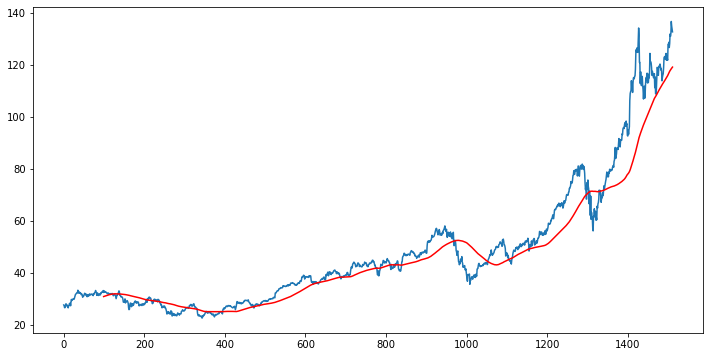

In [136]:
plt.figure(figsize = (12,6))
plt.plot(df1)
plt.plot(ma100,'r')

In [137]:
ma200 = df1.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1507     99.158737
1508     99.494725
1509     99.866312
1510    100.218837
1511    100.573950
Name: Close, Length: 1512, dtype: float64

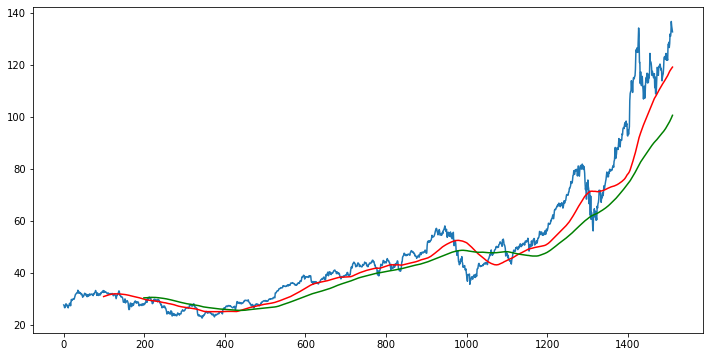

In [138]:
plt.figure(figsize = (12,6))
plt.plot(df1)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [139]:
df1.shape

(1512,)

# Manipulate data 

In [140]:
### lstm are sensitive to  the scale of data. so we apply minmaxscaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [141]:
df1

array([[0.04390693],
       [0.04160643],
       [0.03485825],
       ...,
       [0.98404971],
       [0.97397133],
       [0.96494457]])

In [142]:
df1.shape

(1512, 1)

In [143]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [144]:
training_size,test_size

(982, 530)

In [145]:
df1.shape

(1512, 1)

In [146]:
import numpy as np
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] #i=0,1,2
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [147]:
# reshape into X=t, t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [148]:
print(X_train)

[[0.04390693 0.04160643 0.03485825 ... 0.0899391  0.09245869 0.08606108]
 [0.04160643 0.03485825 0.03488017 ... 0.09245869 0.08606108 0.09136321]
 [0.03485825 0.03488017 0.0381447  ... 0.08606108 0.09136321 0.09079357]
 ...
 [0.2055563  0.20849218 0.20763771 ... 0.22323736 0.21134044 0.22144079]
 [0.20849218 0.20763771 0.21217298 ... 0.21134044 0.22144079 0.22608562]
 [0.20763771 0.21217298 0.20503045 ... 0.22144079 0.22608562 0.20928093]]


In [149]:
print(X_train.shape), print(y_train.shape)

(881, 100)
(881,)


(None, None)

In [150]:
print(X_test.shape), print(ytest.shape)

(429, 100)
(429,)


(None, None)

In [151]:
# reshape input to be [sample, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Model and validate data 

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [153]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [154]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [183]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 4s 167ms/step - loss: 6.0036e-05 - val_loss: 8.8432e-04
Epoch 2/100
14/14 [==============================] - 2s 136ms/step - loss: 5.5383e-05 - val_loss: 7.4598e-04
Epoch 3/100
14/14 [==============================] - 2s 136ms/step - loss: 5.2094e-05 - val_loss: 0.0010
Epoch 4/100
14/14 [==============================] - 2s 133ms/step - loss: 5.7551e-05 - val_loss: 0.0013
Epoch 5/100
14/14 [==============================] - 2s 126ms/step - loss: 5.1172e-05 - val_loss: 9.1033e-04
Epoch 6/100
14/14 [==============================] - 2s 132ms/step - loss: 4.9279e-05 - val_loss: 9.2261e-04
Epoch 7/100
14/14 [==============================] - 2s 148ms/step - loss: 5.1572e-05 - val_loss: 5.4958e-04
Epoch 8/100
14/14 [==============================] - 2s 141ms/step - loss: 4.9309e-05 - val_loss: 5.8111e-04
Epoch 9/100
14/14 [==============================] - 2s 131ms/step - loss: 4.9220e-05 - val_loss: 5.9687e-04
Epoch 10/100
14/14 [=======

In [184]:
#let to prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [185]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [186]:
###Calculator RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

36.31433220612452

In [187]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


81.67553457546316

In [188]:
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

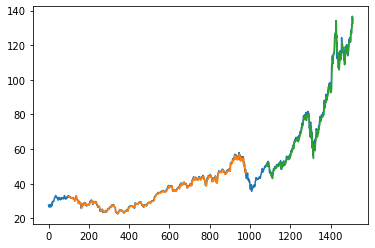

In [189]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# Plot baseline and predictiond
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show

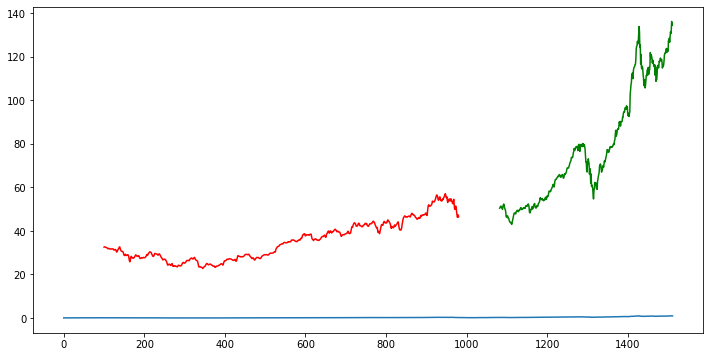

In [190]:
plt.figure(figsize = (12,6))
plt.plot(df1)
plt.plot(trainPredictPlot,'r',testPredictPlot,'g')

In [191]:
len(test_data)

530

In [192]:
x_input=test_data[430:].reshape(1,-1)
x_input.shape

(1, 100)

In [193]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [194]:
temp_input

[0.7606152084675745,
 0.7924718495375525,
 0.8099995647223438,
 0.809101261295572,
 0.8064720772726824,
 0.814841577320523,
 0.8161123072517323,
 0.8386135544124816,
 0.8920292771362018,
 0.9050654751871342,
 0.8960167815249173,
 0.9108934485096286,
 0.8976381406463009,
 0.895863464832875,
 0.9329564091826602,
 0.9780026318585399,
 0.9536391184497482,
 0.8614433659974333,
 0.8621444906519274,
 0.7908066951988606,
 0.8302440543646413,
 0.7966784637386632,
 0.7836203346476133,
 0.8130669015070969,
 0.8146443985482453,
 0.7847596120639708,
 0.7690722989500313,
 0.7383987973766464,
 0.7667937441173159,
 0.7819551803089213,
 0.7408527336673759,
 0.7504929636464258,
 0.7860742040754156,
 0.8095613450975533,
 0.8019367649215152,
 0.8170106106785041,
 0.8255992205387398,
 0.7925594399721688,
 0.8230576938133939,
 0.7937864415489972,
 0.8106130320792945,
 0.8096490023950967,
 0.8271767175798882,
 0.8922921821659054,
 0.8633714253658288,
 0.8641602073178664,
 0.8599535262538286,
 0.8451425855265

# Predictions 

In [195]:
#demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1, n_steps, 1)
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.9773255]
101
1 day input [0.79247185 0.80999956 0.80910126 0.80647208 0.81484158 0.81611231
 0.83861355 0.89202928 0.90506548 0.89601678 0.91089345 0.89763814
 0.89586346 0.93295641 0.97800263 0.95363912 0.86144337 0.86214449
 0.7908067  0.83024405 0.79667846 0.78362033 0.8130669  0.8146444
 0.78475961 0.7690723  0.7383988  0.76679374 0.78195518 0.74085273
 0.75049296 0.7860742  0.80956135 0.80193676 0.81701061 0.82559922
 0.79255944 0.82305769 0.79378644 0.81061303 0.809649   0.82717672
 0.89229218 0.86337143 0.86416021 0.85995353 0.84514259 0.81850052
 0.83190921 0.82630035 0.8164848  0.81026247 0.81035013 0.82393407
 0.77660922 0.81271634 0.75610183 0.75531305 0.76994874 0.80947369
 0.84523024 0.84225056 0.8214802  0.81841286 0.84926161 0.84680774
 0.84724596 0.85636038 0.84838524 0.83646639 0.84181234 0.8304193
 0.79983346 0.81140175 0.81893867 0.82384641 0.84540556 0.8775689
 0.88072389 0.87949696 0.87344987 0.88659566 0.89211687 0.86933085
 0.88212608 0.87485212 0.86933085 0.9

In [196]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [197]:
import matplotlib.pyplot as plt


In [198]:
len(df1)

1512

In [199]:
df3=df1.tolist()
df3.extend(lst_output)

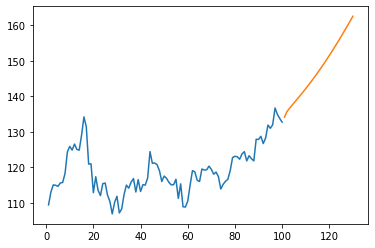

In [201]:
plt.plot(day_new,scaler.inverse_transform(df1[1412:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

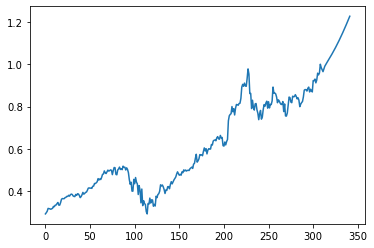

In [202]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
